# Avocado Project
### Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#### relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

#### Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

#### Dataset Link-
#### •	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("E:\prasad.xlsx")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
lab_enc = LabelEncoder()

In [7]:
df2 = lab_enc.fit_transform(df['type'])

pd.Series(df2)

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Length: 18249, dtype: int32

### conventional = 0 & organic =1

In [8]:
df['type'] = df2

df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


In [9]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [11]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,WestTexNewMexico


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  int32         
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int32(1), int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
dtype: float64

In [15]:
skew = ('Total Volume', 4046, 4225, 4770, 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')

for col in skew:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [16]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
dtype: float64

In [17]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,11.316380,8.992344,9.836480,5.053649,10.188148,9.698227,7.115979,2.261434,0.499918,2016.147899
std,0.402677,2.293415,3.358087,2.850342,4.150570,2.261495,2.575460,3.837418,3.503338,0.500014,0.939938
min,0.440000,4.449218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,1.100000,9.290960,6.751183,8.009622,0.000000,8.534962,7.955222,4.855695,0.000000,0.000000,2015.000000
50%,1.370000,11.584108,9.064887,10.277187,5.225693,10.590235,10.179748,7.881828,0.000000,0.000000,2016.000000
75%,1.660000,12.978408,11.617476,11.919775,8.739444,11.615341,11.330668,10.000172,4.894101,1.000000,2017.000000
max,3.250000,17.950767,16.939795,16.834499,14.750207,16.779398,16.409614,15.559322,13.220750,1.000000,2018.000000


from Date column we can seperate day and month. 

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].apply(lambda x:x.month)

df['Day'] = df['Date'].apply(lambda x:x.day)

In [19]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,Albany,12,27
1,2015-12-20,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,Albany,12,20
2,2015-12-13,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,Albany,12,13
3,2015-12-06,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,Albany,12,6
4,2015-11-29,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,Albany,11,29


### Now we have three separate column day, month and year is already have, so drop date column. 

In [20]:
df = df.drop(['Date'], axis=1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,Albany,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,Albany,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,Albany,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,Albany,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,Albany,11,29


<Axes: >

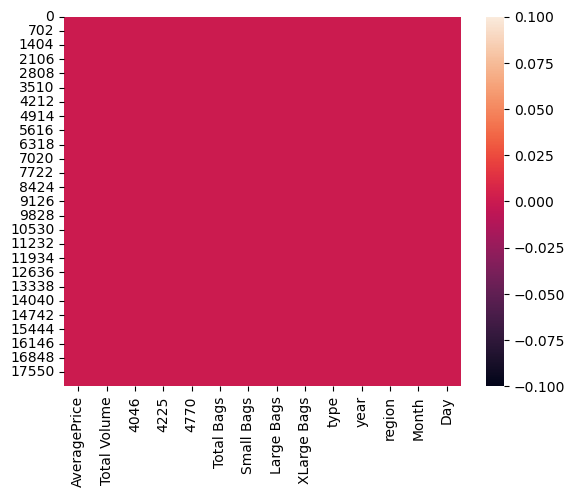

In [21]:
sns.heatmap(df.isna())

<Axes: xlabel='AveragePrice'>

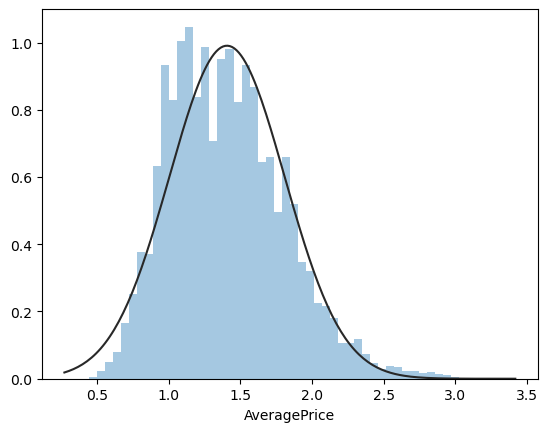

In [22]:
from scipy.stats import norm

sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

### The AveragePrice of avocado is mostly between 1.0 to 1.7.

<Axes: >

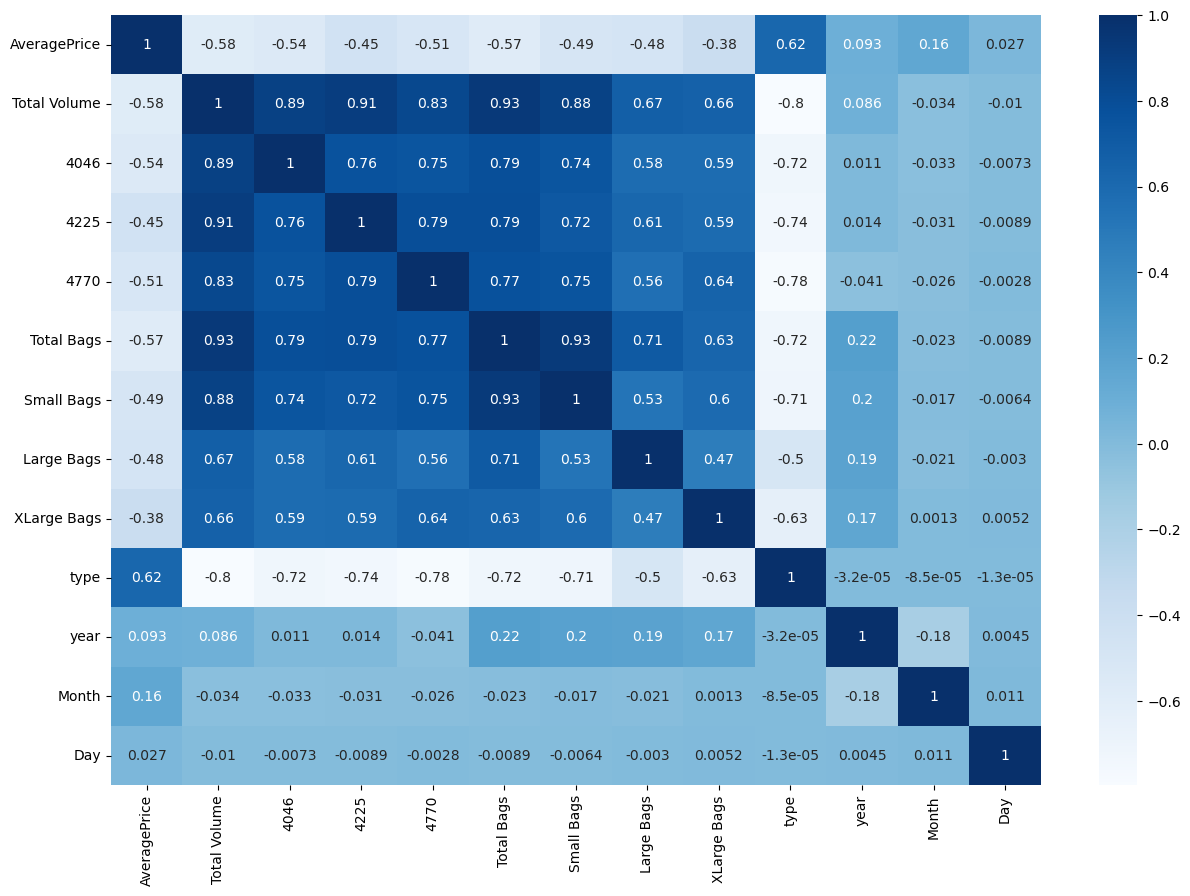

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [24]:
df['region'].nunique()

54

In [25]:
df_new = pd.get_dummies(df.drop(['region'], axis=1), drop_first = True)

In [26]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,11,29


# Model Selection

#### Use Linear regression model because 'AveragePrice' column values in continuous form.

In [27]:
df_new.rename(columns = {4046: 'PLU4046', 4225 : 'PLU4225',  4770 : 'PLU4770'}, inplace = True)
df_new.head()

,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,11,29


In [28]:
x = df_new.drop(columns = ['AveragePrice'])
y = df_new['AveragePrice']

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=348)

# Using Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
pred = lr.predict(x_test)

In [32]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.20835279867176457
MSE: 0.0719815134468673
RMSE: 0.26829370743062037


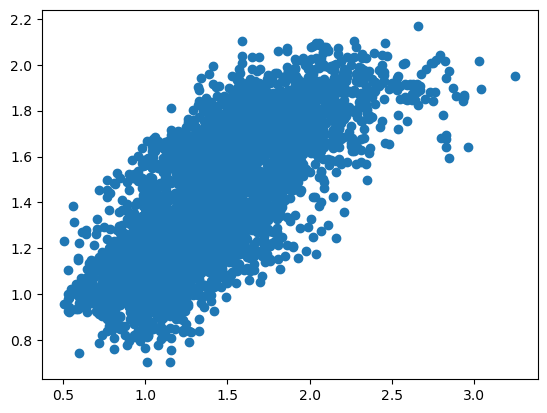

In [33]:
plt.scatter(x=y_test,y=pred)

# Using Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

pred=dtr.predict(x_test)

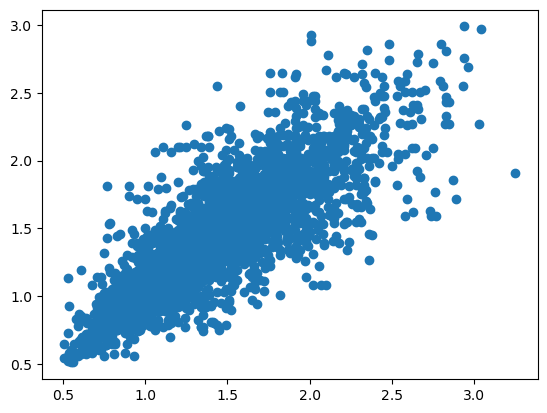

In [35]:
plt.scatter(x=y_test,y=pred)

Now we see that actual staright line.

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13877054569362263
MSE: 0.04573322375630068
RMSE: 0.21385327623466674


# Using Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1018790050405435
MSE: 0.021349046572430412
RMSE: 0.14611312936362156


<Axes: xlabel='AveragePrice', ylabel='Density'>

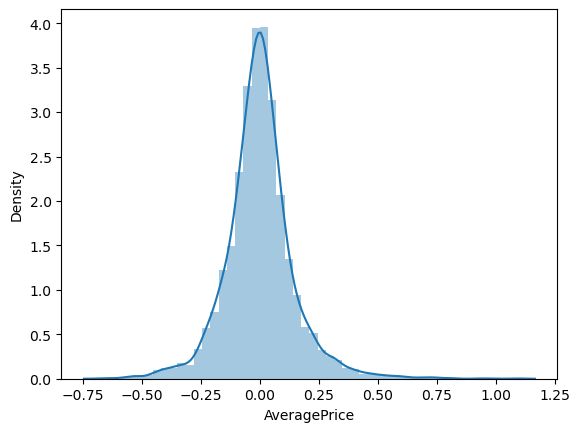

In [39]:
sns.distplot((y_test-pred))

In [40]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])

data.head()

,Y Test,Pred
7220,1.63,1.6299
8181,1.49,1.5003
10787,1.79,1.7933
6221,1.03,1.1649
13046,2.27,1.9376


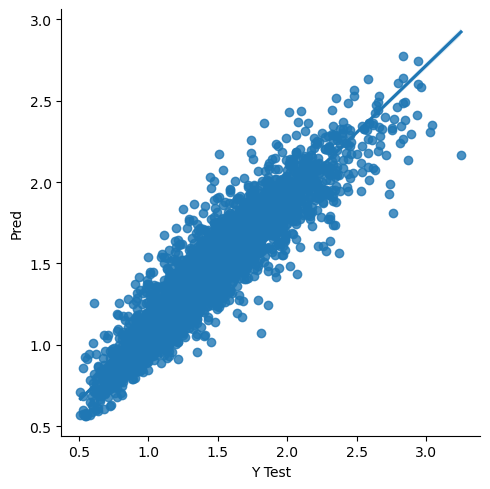

In [41]:
sns.lmplot(x='Y Test',y='Pred',data=data)

## By using Random Forest Regressor we can get less error as compare to other. and also get test data and predicted data in straight line.

# DONE USING LINEAR REGRESSOR

## NOW PREDICTION WITH REGION

In [42]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [43]:
x_new = df.drop(columns = ['region'])
y_new = df['region']

In [44]:
x_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,2,4
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,1,28
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,1,21
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,1,14


In [45]:
y_new

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

In [46]:
x_new.rename(columns = {4046: 'PLU4046', 4225 : 'PLU4225',  4770 : 'PLU4770'}, inplace = True)
x_new.head()

,AveragePrice,Total Volume,PLU4046,PLU4225,PLU4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,11,29


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(x_new)

x_new = pd.DataFrame(x_new, columns = x_new.columns)

In [48]:
x_train, x_test, y_train, y_test = train_test_split (x_new, y_new, test_size=0.30, random_state = 340)

In [49]:
# checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.9128767123287671
[[ 98   0   0 ...   0   0   0]
 [  0  94   0 ...   0   0   0]
 [  0   0 105 ...   0   0   0]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   0 101   0]
 [  0   1   1 ...   0   0  87]]
                     precision    recall  f1-score   support

             Albany       0.86      0.93      0.89       105
            Atlanta       0.88      0.90      0.89       104
BaltimoreWashington       0.95      0.95      0.95       111
              Boise       0.93      0.84      0.88        98
             Boston       0.97      0.92      0.94        97
   BuffaloRochester       0.84      0.80      0.82        95
         California       0.98      0.99      0.99       103
          Charlotte       0.89      0.91      0.90        94
            Chicago       0.96      1.00      0.98       104
   CincinnatiDayton       0.84      0.95      0.89        95
           Columbus       0.81      0.90      0.85       104
      DallasFtWorth       0.97      0.96      0.97      

# 91% using RandomForestClassifier

In [50]:
# checking accuracy for ExtraTreesClassifier

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9229223744292238
[[103   0   0 ...   0   0   0]
 [  0  93   0 ...   0   0   0]
 [  0   0 109 ...   0   0   0]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   1  99   0]
 [  0   0   0 ...   0   0  91]]
                     precision    recall  f1-score   support

             Albany       0.91      0.98      0.94       105
            Atlanta       0.87      0.89      0.88       104
BaltimoreWashington       0.98      0.98      0.98       111
              Boise       0.84      0.90      0.87        98
             Boston       0.99      0.92      0.95        97
   BuffaloRochester       0.94      0.83      0.88        95
         California       0.99      1.00      1.00       103
          Charlotte       0.87      0.95      0.91        94
            Chicago       0.96      0.99      0.98       104
   CincinnatiDayton       0.85      0.95      0.90        95
           Columbus       0.88      0.89      0.89       104
      DallasFtWorth       0.99      0.98      0.99      

# 92% using ExtraTreesClassifier

In [51]:
# checking accuracy for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test, predDT))

0.7870319634703197
[[ 85   0   0 ...   0   0   0]
 [  0  77   0 ...   0   0   2]
 [  0   0 101 ...   0   0   0]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   0  94   0]
 [  0   2   1 ...   0   0  69]]
                     precision    recall  f1-score   support

             Albany       0.77      0.81      0.79       105
            Atlanta       0.73      0.74      0.73       104
BaltimoreWashington       0.86      0.91      0.88       111
              Boise       0.85      0.83      0.84        98
             Boston       0.84      0.79      0.81        97
   BuffaloRochester       0.70      0.79      0.74        95
         California       0.98      0.93      0.96       103
          Charlotte       0.74      0.78      0.76        94
            Chicago       0.81      0.90      0.85       104
   CincinnatiDayton       0.78      0.84      0.81        95
           Columbus       0.62      0.64      0.63       104
      DallasFtWorth       0.90      0.85      0.87      

# 79% using DecisionTreeClassifier

In [52]:
# checking accuracy for ExtraTreesClassifier

final = ExtraTreesClassifier()
final.fit(x_train, y_train)
predET = final.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9225570776255708
[[102   0   0 ...   0   0   0]
 [  0  96   0 ...   0   0   0]
 [  0   0 110 ...   0   0   0]
 ...
 [  0   0   0 ... 110   0   0]
 [  0   0   0 ...   1  99   0]
 [  0   1   0 ...   0   0  91]]
                     precision    recall  f1-score   support

             Albany       0.88      0.97      0.92       105
            Atlanta       0.86      0.92      0.89       104
BaltimoreWashington       0.96      0.99      0.98       111
              Boise       0.86      0.87      0.86        98
             Boston       0.97      0.94      0.95        97
   BuffaloRochester       0.94      0.84      0.89        95
         California       0.98      1.00      0.99       103
          Charlotte       0.89      0.89      0.89        94
            Chicago       0.97      1.00      0.99       104
   CincinnatiDayton       0.81      0.94      0.87        95
           Columbus       0.85      0.90      0.88       104
      DallasFtWorth       0.99      0.97      0.98      

In [54]:
from pickle import dump
dump(final,open('avocado_project.pkl','wb'))

In [55]:
import pickle
loaded_model = pickle.load(open('avocado_project.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

92.25570776255708


In [56]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474
Predicted,MiamiFtLauderdale,SanDiego,PhoenixTucson,HartfordSpringfield,Sacramento,Midsouth,NorthernNewEngland,Chicago,Houston,Detroit,...,Detroit,WestTexNewMexico,Denver,TotalUS,Indianapolis,California,Jacksonville,Spokane,Pittsburgh,Denver
Original,MiamiFtLauderdale,SanDiego,PhoenixTucson,HartfordSpringfield,Sacramento,Midsouth,NorthernNewEngland,Chicago,Houston,Detroit,...,Detroit,WestTexNewMexico,Denver,TotalUS,Indianapolis,California,Jacksonville,Spokane,Pittsburgh,Denver


# END